In [ ]:
!git clone https://github.com/wooihaw/imlp_sep2023

Cloning into 'imlp_sep2023'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 36 (delta 11), reused 27 (delta 6), pack-reused 0
Receiving objects: 100% (36/36), 1.01 MiB | 8.05 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [ ]:
cd /content/imlp_sep2023/Examples/

/content/imlp_sep2023/Examples


# Examples

## Initialization

In [ ]:
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

## Collect Data

In [ ]:
# Example 1
# Import the necessary module from scikit-learn
from sklearn.datasets import load_iris
# Load the Iris dataset
iris_data = load_iris()
# Extract features and target variables
X = iris_data.data
y = iris_data.target
# Display feature names and target names
print("Feature Names:", iris_data.feature_names)
print("Target Names:", iris_data.target_names)

Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Names: ['setosa' 'versicolor' 'virginica']


In [ ]:
# Example 2
# Import read_csv function from pandas
from pandas import read_csv
df = read_csv("heights_weights_genders.csv")
print(df.head())

X = df.drop(columns=['Gender'])
y = df['Gender']
print(df.shape, X.shape, y.shape)

   Height(cm)  Weight(kg) Gender
0       187.6       109.7   Male
1       174.7        73.6   Male
2       188.2        96.5   Male
3       182.2        99.8   Male
4       177.5        93.6   Male
(10000, 3) (10000, 2) (10000,)


In [ ]:
# Example 3
# Import read_csv function from pandas
from pandas import read_csv
df = read_csv('heights_weights_genders.csv')
print(df.describe())  # print the statistical summary of the data
class_counts = df.groupby('Gender').size()
print(class_counts)  # print the class breakdown of the data

         Height(cm)    Weight(kg)
count  10000.000000  10000.000000
mean     168.573940     73.228260
std        9.772842     14.563851
min      137.800000     29.300000
25%      161.300000     61.600000
50%      168.400000     73.100000
75%      175.700000     84.900000
max      200.700000    122.500000
Gender
Female    5000
Male      5000
dtype: int64


## Handling Missing Values

In [ ]:
# Example 1
# Handling missing values by dropping data samples with missing values
import pandas as pd
import numpy as np
df = pd.DataFrame({'Age': [17, 23, 'x', 38, 54, 67, 32],
                  'Height': [160, 172, 150, 165, 163, 158, 175],
                  'Weight':[50, 68, 43, 52, 47, 49, 'x']})
df = df.replace({'x': np.nan}) # replace missing values (x) with NaN
print(df)
print(df.isnull().sum())
df = df.dropna() # drop rows with NaN
print(df)

    Age  Height  Weight
0  17.0     160    50.0
1  23.0     172    68.0
2   NaN     150    43.0
3  38.0     165    52.0
4  54.0     163    47.0
5  67.0     158    49.0
6  32.0     175     NaN
Age       1
Height    0
Weight    1
dtype: int64
    Age  Height  Weight
0  17.0     160    50.0
1  23.0     172    68.0
3  38.0     165    52.0
4  54.0     163    47.0
5  67.0     158    49.0


In [ ]:
# Example 2
# Handling missing values by imputing missing values with statistic
import pandas as pd
import numpy as np
df = pd.DataFrame({'Age': [17, 23, 'x', 38, 54, 67, 32],
                  'Height': [160, 172, 150, 165, 163, 158, 175],
                  'Weight':[50, 68, 43, 52, 47, 49, 'x']})
df = df.replace({'x': np.nan})
df['Age'] = df['Age'].fillna(df['Age'].median()) # replace NaN with median
df['Weight'] = df['Weight'].fillna(df['Weight'].mean()) # replace NaN with mean
print(df)

    Age  Height  Weight
0  17.0     160    50.0
1  23.0     172    68.0
2  35.0     150    43.0
3  38.0     165    52.0
4  54.0     163    47.0
5  67.0     158    49.0
6  32.0     175    51.5


## Handling categorical data

In [ ]:
import pandas as pd
df0 = pd.DataFrame({'year':[2015, 2017, 2013, 2018, 2020],
                  'make':['Toyota', 'Honda', 'Perodua', 'Hyundai', 'Toyota'],
                  'engine':[1.5, 1.8, 1.3, 1.6, 1.8],
                  'review':['moderate', 'good', 'poor', 'moderate', 'good']})
mapping = {'poor':1, 'moderate':2, 'good':3}
df0['review'] = df0['review'].map(mapping) # encode ordinal data
df0 = pd.get_dummies(df0) # encode nominal data
print(df0)

   year  engine  review  make_Honda  make_Hyundai  make_Perodua  make_Toyota
0  2015     1.5       2           0             0             0            1
1  2017     1.8       3           1             0             0            0
2  2013     1.3       1           0             0             1            0
3  2018     1.6       2           0             1             0            0
4  2020     1.8       3           0             0             0            1


## Hold-out Validation

In [ ]:
# Hold-out validation
from pandas import read_csv
from sklearn.model_selection import train_test_split as split
from sklearn.neighbors import KNeighborsClassifier
df = read_csv("heights_weights_genders.csv")
X = df.drop(columns=['Gender'])
y = df['Gender']
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)
model = KNeighborsClassifier()
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
print(f"Accuracy: {result:.2%}")

Accuracy: 91.44%


## k-fold Cross Validation

In [ ]:
# k-fold Cross-validation
from pandas import read_csv
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
df = read_csv("heights_weights_genders.csv")
X = df.drop(columns=['Gender'])
y = df['Gender']
model = KNeighborsClassifier()
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
results = cross_val_score(model, X, y, cv=kfold)
print(f"Accuracy: {results.mean():.2%} ({results.std():.2%})")

Accuracy: 90.72% (0.63%)


## Linear Regression

In [ ]:
# Linear Regression
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LinearRegression
from pandas import read_csv
df = read_csv("heights_weights_genders.csv")
#df.info()
X = df.drop(columns=['Weight(kg)', 'Gender'])
y = df['Weight(kg)']
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)
lr = LinearRegression().fit(X_train, y_train)
print(f'R2 score: {lr.score(X_test, y_test):.2f}')

R2 score: 0.86


## k-NN Regression

In [ ]:
# k-NN Regressor
from sklearn.model_selection import train_test_split as split
from sklearn.neighbors import KNeighborsRegressor
from pandas import read_csv
df = read_csv("heights_weights_genders.csv")
X = df.drop(columns=['Weight(kg)', 'Gender'])
y = df['Weight(kg)']
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)
knn = KNeighborsRegressor().fit(X_train, y_train)
print(f'R2 score: {knn.score(X_test, y_test):.2f}')

R2 score: 0.83


## Logistic Regression

In [ ]:
# Logistic Regression
from pandas import read_csv
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LogisticRegression
df = read_csv("heights_weights_genders.csv")
X = df.drop(columns=['Gender'])
y = df['Gender']
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)
lgr = LogisticRegression().fit(X_train, y_train)
print(f'Accuracy: {lgr.score(X_test, y_test):.2%}')

Accuracy: 92.36%


## k-NN Classification

In [ ]:
# k-NN Classification
from pandas import read_csv
from sklearn.model_selection import train_test_split as split
from sklearn.neighbors import KNeighborsClassifier
df = read_csv("heights_weights_genders.csv")
X = df.drop(columns=['Gender'])
y = df['Gender']
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)
knn = KNeighborsClassifier().fit(X_train, y_train)
print(f'Accuracy: {knn.score(X_test, y_test):.2%}')

Accuracy: 91.44%


Train accuracy: 99.21%
Test accuracy: 87.72%


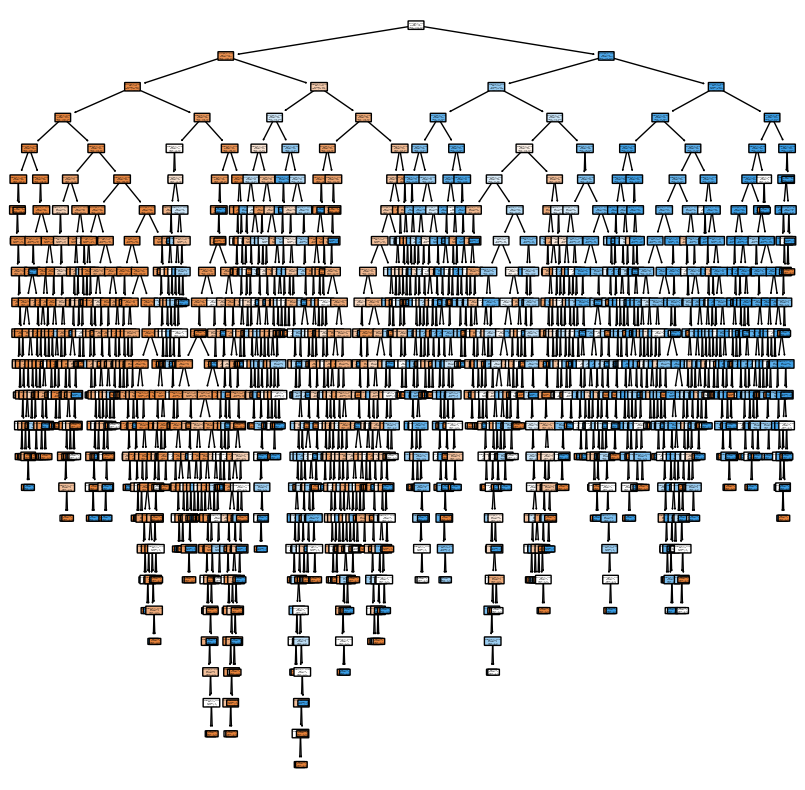

In [ ]:
# Decision Tree Classification
from pandas import read_csv
from sklearn.model_selection import train_test_split as split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

df = read_csv("heights_weights_genders.csv")
X = df.drop(columns=['Gender'])
y = df['Gender']
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)
dtc = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
print(f'Train accuracy: {dtc.score(X_train, y_train):.2%}')
print(f'Test accuracy: {dtc.score(X_test, y_test):.2%}')

# Plot tree
plt.figure(figsize=(10, 10))
plot_tree(dtc, feature_names=df.columns[:-1], class_names=['Female', 'Male'], rounded=True, filled=True)
plt.show()

Train accuracy: 90.65%
Test accuracy: 90.96%


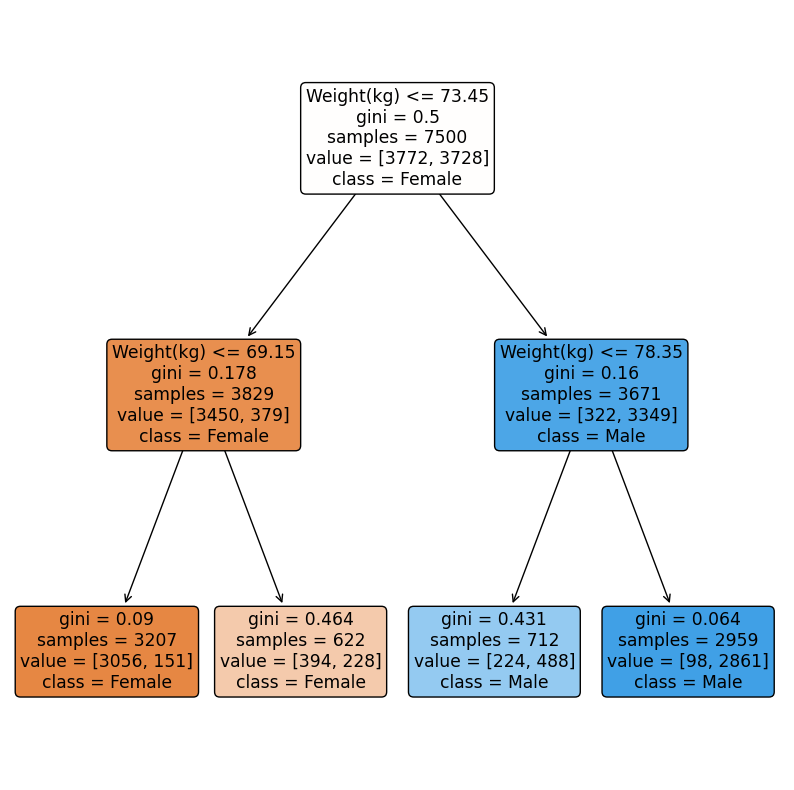

In [ ]:
# Decision Tree Classification with maximum depth of 2
from pandas import read_csv
from sklearn.model_selection import train_test_split as split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

df = read_csv("heights_weights_genders.csv")
X = df.drop(columns=['Gender'])
y = df['Gender']
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)
dtc = DecisionTreeClassifier(random_state=42, max_depth=2).fit(X_train, y_train)
print(f'Train accuracy: {dtc.score(X_train, y_train):.2%}')
print(f'Test accuracy: {dtc.score(X_test, y_test):.2%}')

# Plot tree
plt.figure(figsize=(10, 10))
plot_tree(dtc, feature_names=df.columns[:-1], class_names=['Female', 'Male'], rounded=True, filled=True)
plt.show()

Train accuracy: 91.08%
Test accuracy: 91.12%


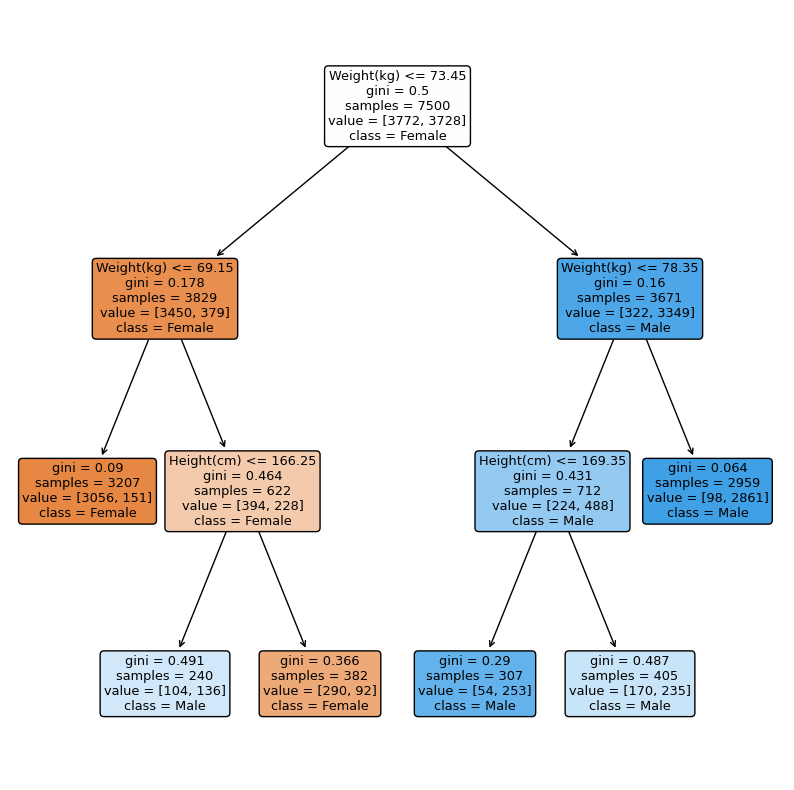

In [ ]:
# Decision Tree Classification with maximum leaf nodes of 6
from pandas import read_csv
from sklearn.model_selection import train_test_split as split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

df = read_csv("heights_weights_genders.csv")
X = df.drop(columns=['Gender'])
y = df['Gender']
X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)
dtc = DecisionTreeClassifier(random_state=42, max_leaf_nodes=6).fit(X_train, y_train)
print(f'Train accuracy: {dtc.score(X_train, y_train):.2%}')
print(f'Test accuracy: {dtc.score(X_test, y_test):.2%}')

# Plot tree
plt.figure(figsize=(10, 10))
plot_tree(dtc, feature_names=df.columns[:-1], class_names=['Female', 'Male'], rounded=True, filled=True)
plt.show()

## k-means Clustering

Text(0.5, 1.0, 'After clustering')

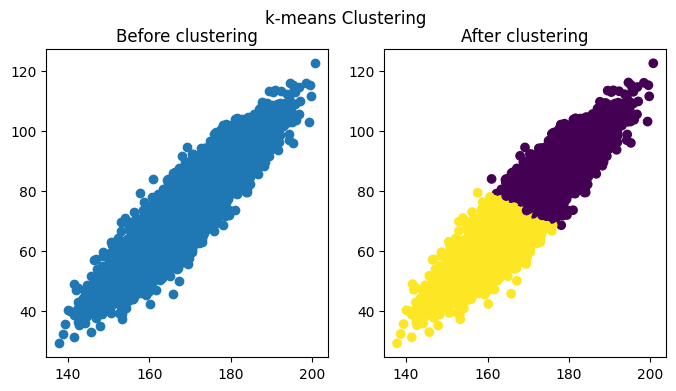

In [ ]:
from pandas import read_csv
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
df = read_csv("heights_weights_genders.csv")
X = df.drop(columns=['Gender'])
km = KMeans(n_clusters=2).fit(X)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle('k-means Clustering')
ax1.scatter(X.values[:, 0], X.values[:, 1])
ax1.set_title('Before clustering')
ax2.scatter(X.values[:, 0], X.values[:, 1], c=km.labels_)
ax2.set_title('After clustering')